<a href="https://colab.research.google.com/github/IndraLV/Python_Indiviual_Task_3/blob/main/Python_individual_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
titanic_df = pd.read_csv('/content/train.csv')

In [51]:
# Display the first few rows to get an overview of the data structure.
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
# Check the dimensions of the dataset (number of rows and columns).
rows, columns = titanic_df.shape
print(f'Dataset contains {rows} rows and  {columns} columns.')

Dataset contains 891 rows and  12 columns.


In [56]:
# Identify missing values and decide on strategies for handling them.
titanic_df.isnull().sum()
print(titanic_df.isnull().sum())

# Filling in missing values.
fill_values = {
    'Age': titanic_df['Age'].mean(),
    'Cabin': 0,
    'Embarked': 0
}

titanic_df.fillna(fill_values, inplace=True)

# Checking are there no missing values anymore.
print(titanic_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [57]:
# Compute basic statistics (e.g., mean, median, min, max) for numerical columns.
numerical_df = titanic_df.select_dtypes(include='number')

min_values = numerical_df.min()
max_values = numerical_df.max()
mean_values = numerical_df.mean()
median_values = numerical_df.median()

statistics = pd.DataFrame({
    'Min': min_values,
    'Max': max_values,
    'Mean': mean_values,
    'Median': median_values
})

print(statistics)


              Min       Max        Mean      Median
PassengerId  1.00  891.0000  446.000000  446.000000
Survived     0.00    1.0000    0.383838    0.000000
Pclass       1.00    3.0000    2.308642    3.000000
Age          0.42   80.0000   29.699118   29.699118
SibSp        0.00    8.0000    0.523008    0.000000
Parch        0.00    6.0000    0.381594    0.000000
Fare         0.00  512.3292   32.204208   14.454200


In [60]:
# Analyze categorical variables (e.g., value counts).
titanic_df['Age'].value_counts()
titanic_df['Sex'].value_counts()

unique_passengers = titanic_df['PassengerId'].nunique()
male_passengers = titanic_df[titanic_df['Sex'] == 'male']
female_passengers = titanic_df[titanic_df['Sex'] == 'female']
number_of_kids = titanic_df[titanic_df['Age'] < 18]
male_kids = number_of_kids[number_of_kids['Sex'] == 'male']
female_kids = number_of_kids[number_of_kids['Sex'] == 'female']
survived_passengers = titanic_df[titanic_df['Survived'] == 1]
survived_kids = number_of_kids[number_of_kids['Survived'] == 1]
survived_male_passengers = survived_passengers[survived_passengers['Sex'] == 'male']
survived_female_passengers = survived_passengers[survived_passengers['Sex'] == 'female']
survived_male_kids = survived_kids[survived_kids['Sex'] == 'male']
survived_female_kids = survived_kids[survived_kids['Sex'] == 'female']

print(f'There were {unique_passengers} passengers (male: {len(male_passengers)}, female: {len(female_passengers)}) on Titanic and {len(number_of_kids)} of them were kids (male: {len(male_kids)}, female: {len(female_kids)}).')
print(f'There were {len(survived_passengers)} survivors (male: {len(survived_male_passengers)}, female: {len(survived_female_passengers)}) and {len(survived_kids)} of them were kids (male: {len(survived_male_kids)}, female: {len(survived_female_kids)}).')


There were 891 passengers (male: 577, female: 314) on Titanic and 113 of them were kids (male: 58, female: 55).
There were 342 survivors (male: 109, female: 233) and 61 of them were kids (male: 23, female: 38).


In [76]:
# Encoding Sex to be numerical value.
titanic_df['Sex_encoded'] = titanic_df['Sex'].map({'male': 0, 'female': 1})

# Calculating correlation between sex and survival.
correlation = titanic_df[['Sex_encoded', 'Survived']].corr().loc['Sex_encoded', 'Survived']

print(f"Correlation between sex and survival is {correlation:.3f}")

Correlation between sex and survival is 0.543


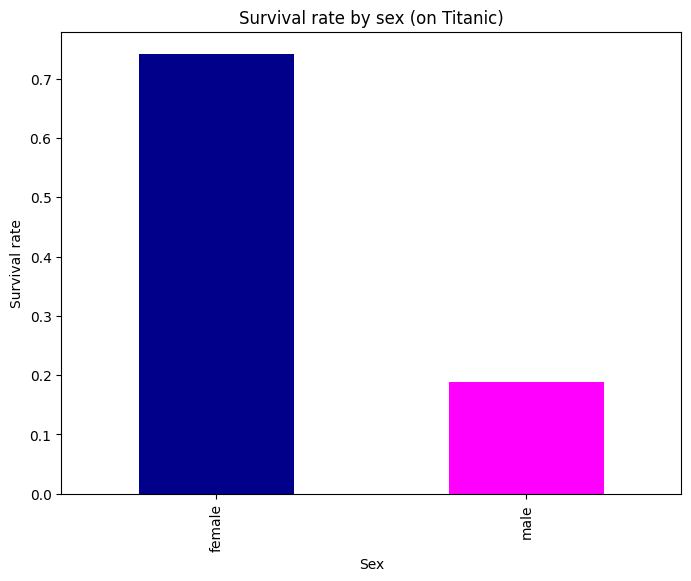

In [81]:
# Calculating and visualizing survival rate by sex.
survival_rate_by_sex = titanic_df.groupby('Sex')['Survived'].mean()

plt.figure(figsize=(8, 6))
survival_rate_by_sex.plot(kind='bar', color=['darkblue', 'magenta'])

plt.xlabel('Sex')
plt.ylabel('Survival rate')
plt.title('Survival rate by sex (on Titanic)')

plt.show()

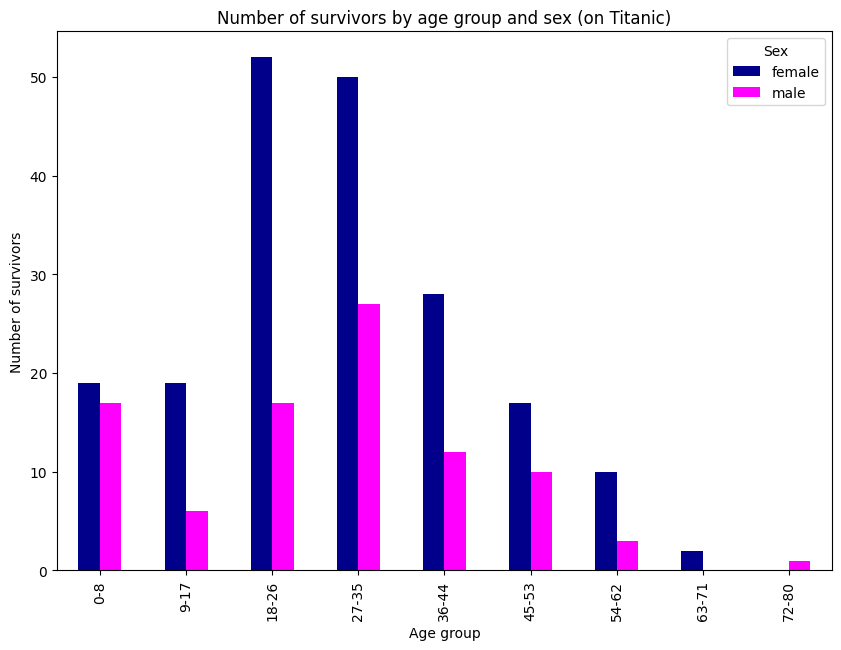

In [90]:
# Calculating and visualizing survivals by age and sex.
survived_df = titanic_df[titanic_df['Survived'] == 1]

age_bins = [0, 8, 17, 26, 35, 44, 53, 62, 71, 80]
age_labels = ['0-8', '9-17', '18-26', '27-35', '36-44', '45-53', '54-62', '63-71', '72-80']

survived_df = survived_df.copy()
survived_df['AgeGroup'] = pd.cut(survived_df['Age'], bins=age_bins, labels=age_labels)

survivor_counts = survived_df.groupby(['AgeGroup', 'Sex'], observed=False).size().unstack(fill_value=0)

survivor_counts.plot(kind='bar', stacked=False, figsize=(10, 7), color=['darkblue', 'magenta'])

plt.xlabel('Age group')
plt.ylabel('Number of survivors')
plt.title('Number of survivors by age group and sex (on Titanic)')
plt.legend(title='Sex')

plt.show()

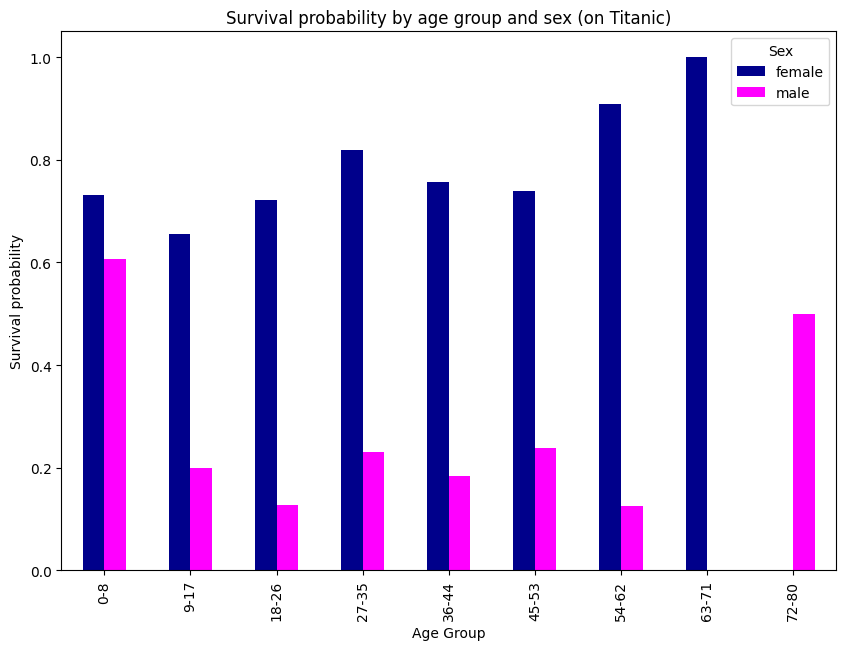

In [94]:
# Calculating and visualizing survival propability by age and sex.
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=age_bins, labels=age_labels)

survival_rates = titanic_df.groupby(['AgeGroup', 'Sex'], observed=False)['Survived'].mean().unstack()

survival_rates.plot(kind='bar', stacked=False, figsize=(10, 7), color=['darkblue', 'magenta'])

plt.xlabel('Age Group')
plt.ylabel('Survival probability')
plt.title('Survival probability by age group and sex (on Titanic)')
plt.legend(title='Sex')

plt.show()

In [95]:
# Calculating top survival rates by age and sex.
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=age_bins, labels=age_labels)

survival_rates = titanic_df.groupby(['AgeGroup', 'Sex'], observed=False)['Survived'].mean().reset_index()

top_survival_rates = survival_rates.sort_values(by='Survived', ascending=False).head(3)

print(top_survival_rates)

   AgeGroup     Sex  Survived
14    63-71  female  1.000000
12    54-62  female  0.909091
6     27-35  female  0.819672


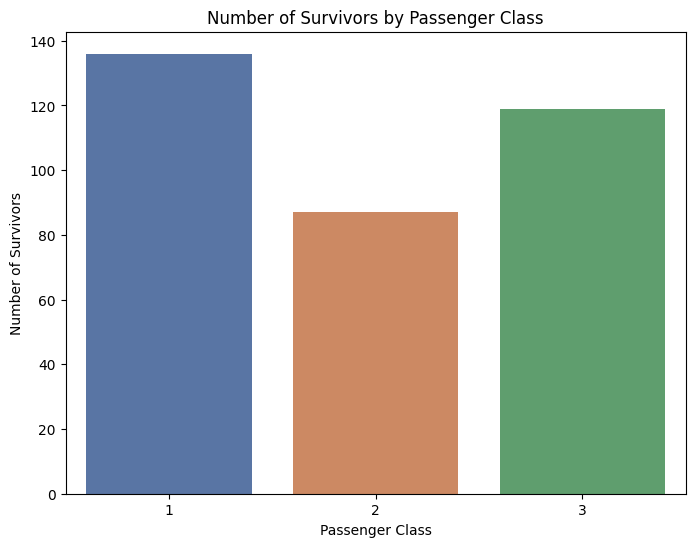

In [111]:
# Calculating and visualizing survivals by passenger class using Seaborn.
survivors_by_pclass = survived_df['Pclass'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
sns.countplot(data=survived_df, x='Pclass', hue='Pclass', palette='deep', legend=False)

plt.xlabel('Passenger Class')
plt.ylabel('Number of Survivors')
plt.title('Number of Survivors by Passenger Class')

plt.show()